# **Problem Statement**

**DESCRIPTION**


**Problem Statement:**
Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.
Objective: Use a deep convolutional neural network to perform facial recognition using Keras.


**Dataset Details:**
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.
Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0


**Prerequisites:**
Keras
Scikit Learn
Steps to be followed:
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:

  i. Convolutional Layer

  ii. Pooling Layer

  iii. Fully Connected Layer

6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%

## Task 1 - Import Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
import cv2

## Task 2 - Load the dataset after loading the dataset , you have to normalize every image.

In [12]:
# Load the NPZ file to data
ORL_faces= np.load("ORL_faces.npz",allow_pickle=False)
ORL_faces.files

['testY', 'testX', 'trainX', 'trainY']

#### there are 4 folders present in the given data set. trainX, trainY, testX and testY

In [19]:
# Size of the data
print(ORL_faces['trainX'].shape)

(240, 10304)


In [20]:
print(ORL_faces[item])

[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15
 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 19 19]


### Train data set contains 12 images of 20mpersons each (Total size is 240)

In [30]:
print(ORL_faces['trainY'].shape)
print(ORL_faces[item])

(240,)
[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15
 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 19 19]


In [31]:
print(ORL_faces['testX'].shape)
print(ORL_faces[item])

(160, 10304)
[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15
 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 19 19]


### Train data set contains 8 images of 20mpersons each (Total size si 160)

In [32]:
print(ORL_faces['testY'].shape)
print(ORL_faces[item])

(160,)
[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15
 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 19 19]


In [40]:
print("Minimum Pixels of trainX: ", ORL_faces['trainX'].min(), "\t",
      "Maximum Pixels of trainX: ", ORL_faces['trainX'].max(), "\n")

Minimum Pixels of trainX:  0.0 	 Maximum Pixels of trainx:  244.0 



In [42]:
print("Minimum Pixels of testX: ", ORL_faces['testX'].min(), "\t",
      "Maximum Pixels of testX: ", ORL_faces['testX'].max(), "\n")

Minimum Pixels of testX:  0.0 	 Maximum Pixels of testX:  244.0 



In [44]:
trainX_normalize = np.array(ORL_faces['trainX'],dtype='float64')/255

In [46]:
trainX_normalize

array([[0.18823529, 0.19215686, 0.17647059, ..., 0.18431373, 0.18039216,
        0.18039216],
       [0.23529412, 0.23529412, 0.24313725, ..., 0.1254902 , 0.13333333,
        0.13333333],
       [0.15294118, 0.17254902, 0.20784314, ..., 0.11372549, 0.10196078,
        0.11372549],
       ...,
       [0.44705882, 0.45882353, 0.44705882, ..., 0.38431373, 0.37647059,
        0.38431373],
       [0.41176471, 0.41176471, 0.41960784, ..., 0.21176471, 0.18431373,
        0.16078431],
       [0.45490196, 0.44705882, 0.45882353, ..., 0.37254902, 0.39215686,
        0.39607843]])

In [47]:
trainX_normalize.min()

0.0

In [48]:
trainX_normalize.max()

0.9568627450980393

In [50]:
testX_normalize = np.array(ORL_faces['testX'],dtype='float64')/255
print("Minimum Pixels of testX_normalize: ", testX_normalize.min(), "\t",
      "Maximum Pixels of testX_normalize: ", testX_normalize.max(), "\n")

Minimum Pixels of testX_normalize:  0.0 	 Maximum Pixels of testX_normalize:  0.9568627450980393 



In [ ]:
print("Minimum Pixels of testX_normalize: ", trainX_normalize.min(), "\t",
      "Maximum Pixels of trainX_normalize: ", trainX_normalize.max(), "\n")

In [52]:
trainX_image= np.reshape(trainX_normalize, (240, 112, 92,1))
testX_image= np.reshape(testX_normalize, (160, 112, 92,1))

## Task 3 - Seperate the Train and Test Data

In [59]:
X_train,X_test,y_train,y_test=trainX_image,testX_image, ORL_faces['trainY'],ORL_faces['testY']
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 112, 92, 1), (160, 112, 92, 1), (240,), (160,))

## **Task 4 - Transform the images to equal sizes**

In [ ]:
#imageGrayScale = np.array([cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in x_train)

In [63]:
X_trainFinal = np.array([cv2.resize(i,(112,92), interpolation=cv2.INTER_CUBIC) for i in X_train])
print("Shape of X Train: ", X_trainFinal.shape)

Shape of X Train:  (240, 92, 112)


In [65]:
X_testFinal = np.array([cv2.resize(i,(112,92), interpolation=cv2.INTER_CUBIC) for i in X_test])
print("Shape of X Test: ", X_testFinal.shape)

Shape of X Test:  (160, 92, 112)


## **Changing classes count for Label**

In [66]:
y_train_final = tf.keras.utils.to_categorical(y_train, num_classes=20, dtype='float32')
y_test_final = tf.keras.utils.to_categorical(y_test, num_classes=20, dtype='float32')

## **Task 5 - Creating CNN Model**

i. Convolutional Layer

ii. Pooling Layer

iii. Fully Connected Layer

In [79]:
x_train_edited = np.array([np.reshape(i, (112, 92, 1)) for i in X_train])
x_test_edited = np.array([np.reshape(i, (112, 92, 1)) for i in X_test])
print(x_train_edited.shape,",",x_test_edited.shape)

(240, 112, 92, 1) , (160, 112, 92, 1)


In [80]:
# Set Parameters
batchSize = 12
epochs = 200
tf.random.set_seed(2507)
np.random.seed(2507)

# Initialising the CNN
classifier = tf.keras.models.Sequential()

# Step 1 - Convolution  #No of Feature Maps, Filter, color image with channel,
classifier.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape = (112, 92, 1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(tf.keras.layers.Flatten())
#classifier.add(tf.keras.layers.GlobalAveragePooling2D())

# Step 4 - Full connection
classifier.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))
classifier.add(tf.keras.layers.Dropout(0.25))
classifier.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
classifier.add(tf.keras.layers.Dropout(0.25))
classifier.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
classifier.add(tf.keras.layers.Dropout(0.25))
classifier.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
classifier.add(tf.keras.layers.Dense(units = 20, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = "Adam" , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [81]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 110, 90, 32)       320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 55, 45, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 53, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 21, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 19, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 9, 128)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 13824)            

In [82]:
#Custom Callback

class MyThresholdCallBack(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(MyThresholdCallBack, self).__init__()
        self.cl = cl
        
    def on_epoch_end(self, epoch, logs=None):
        test_score = logs["val_accuracy"]
        train_score = logs["accuracy"]
        
        if test_score > train_score and test_score > self.cl:
        #if test_score > self.cl:
            self.model.stop_training = True

## **Task 6 - Train the Model**

In [86]:
myR2ScoreMonitor = MyThresholdCallBack(cl=0.90)

history = classifier.fit(x = x_train_edited, y = y_train_final,
                              validation_data = (x_test_edited, y_test_final),
                              steps_per_epoch= (X_trainFinal.shape[0])/batchSize,
                              epochs = epochs,
                              callbacks = [myR2ScoreMonitor],
                              validation_steps= (X_testFinal.shape[0])/batchSize,  
                              verbose=2
                              )

Epoch 1/200
20/20 - 2s - loss: 3.0083 - accuracy: 0.0208 - val_loss: 2.9956 - val_accuracy: 0.0500
Epoch 2/200
20/20 - 2s - loss: 2.9976 - accuracy: 0.0542 - val_loss: 2.9953 - val_accuracy: 0.0500
Epoch 3/200
20/20 - 2s - loss: 2.9962 - accuracy: 0.0250 - val_loss: 2.9941 - val_accuracy: 0.0500
Epoch 4/200
20/20 - 2s - loss: 2.9968 - accuracy: 0.0417 - val_loss: 2.9942 - val_accuracy: 0.0500
Epoch 5/200
20/20 - 2s - loss: 2.9938 - accuracy: 0.0417 - val_loss: 2.9662 - val_accuracy: 0.0500
Epoch 6/200
20/20 - 2s - loss: 2.9057 - accuracy: 0.0625 - val_loss: 2.8242 - val_accuracy: 0.1125
Epoch 7/200
20/20 - 2s - loss: 2.7739 - accuracy: 0.1500 - val_loss: 2.5620 - val_accuracy: 0.2000
Epoch 8/200
20/20 - 2s - loss: 2.3733 - accuracy: 0.2042 - val_loss: 1.8701 - val_accuracy: 0.3562
Epoch 9/200
20/20 - 2s - loss: 1.6860 - accuracy: 0.4542 - val_loss: 1.2235 - val_accuracy: 0.5938
Epoch 10/200
20/20 - 2s - loss: 1.2098 - accuracy: 0.5875 - val_loss: 1.0161 - val_accuracy: 0.7063
Epoch 11/

## **Task 7 - Train Results (Graph Visualization)**

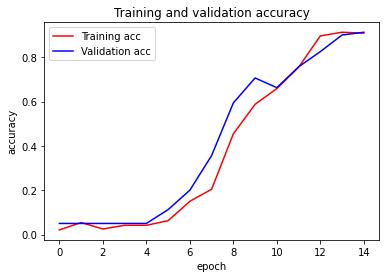

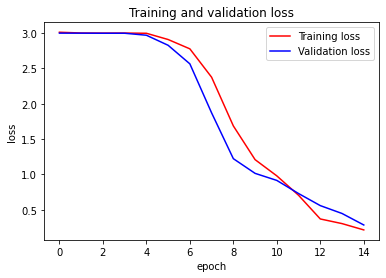

In [87]:
#Graphing our training and validation
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

## **Task 8 - Model trained above 90% and generalized successfully**

In [88]:
# training accuracy after final epoch
history.history['accuracy'][-1]

0.9083333611488342

In [89]:
# test accuracy after final epoch
history.history['val_accuracy'][-1]

0.9125000238418579

## **Save The Model**

In [103]:
#classifier.save("FaceDetection.tf")
classifier.save("FaceRecognition.h5")
classifier.save('FaceRecognition.tf2')

INFO:tensorflow:Assets written to: FaceRecognition.tf2\assets
